# welcome to my dataset

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

<h1 id="section3" style="color: #1d3557;">1-import package

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import cm
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, chi2

<h1 id="section3" style="color: #1d3557;">2- Meet and Greet Data

In [2]:
df= pd.read_csv('heart.csv')
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

<h1 id="section3" style="color: #1d3557;">3- Explanation of Columns in the dataset</h1>



***
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

***

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df['HeartDisease'] = df['HeartDisease'].astype('category')
df['FastingBS'] = df['FastingBS'].astype('category')
df['HeartDisease'] = df['HeartDisease'].cat.rename_categories({1: 'Yes', 0: 'No'})

In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = df.select_dtypes(include=numerics).columns
numerical_columns

Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'], dtype='object')

In [7]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina',
       'ST_Slope', 'HeartDisease'],
      dtype='object')

<h1 id="section3" style="color: #1d3557;">4 - Descriptive Statistics

In [8]:
df.describe().T.style.background_gradient(cmap = "Blues")

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000


In [9]:
df.describe(include = ['object', 'category']).T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
FastingBS,918,2,0,704
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460
HeartDisease,918,2,Yes,508


<h1 id="section3" style="color: #1d3557;">5 - Exploratory Analysis


## 5-1 Categorical Features :
### 5-1-1 Binary Features

In [10]:
def pie_charts(data, feature, target):
    colors = sns.color_palette('pastel')[0:5]
    fig,axes = plt.subplots(1,2,figsize=(12,8))
    labels = df[feature].unique()
    textprops = {"fontsize":15}

    axes[0].pie(df[df[target]=="No"][feature].value_counts(),colors=colors, labels=labels,autopct='%1.1f%%',textprops =textprops)
    axes[0].set_title('No {}'.format(target),fontsize=15)
    axes[1].pie(df[df[target]=="Yes"][feature].value_counts(),colors=colors, labels=labels,autopct='%1.1f%%',textprops =textprops)
    axes[1].set_title('Yes {}'.format(target),fontsize=15)

    plt.legend(title = feature, fontsize=15, title_fontsize=15)
    plt.show()

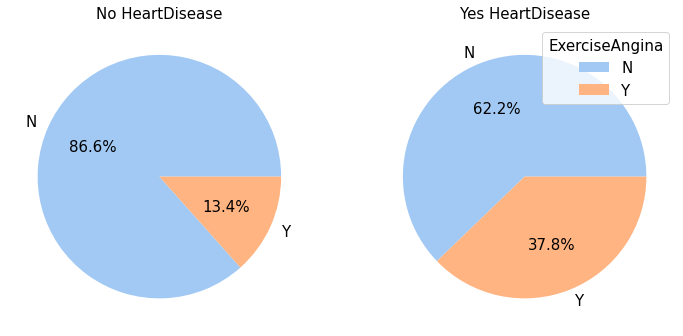

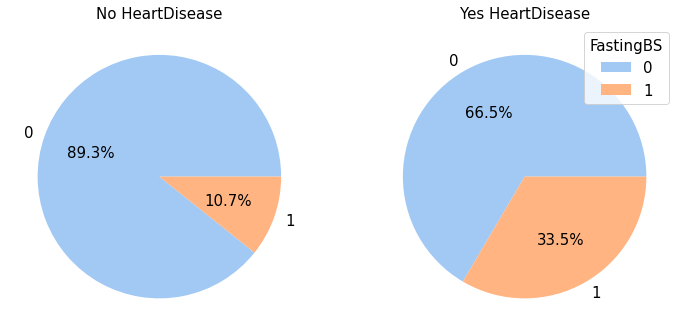

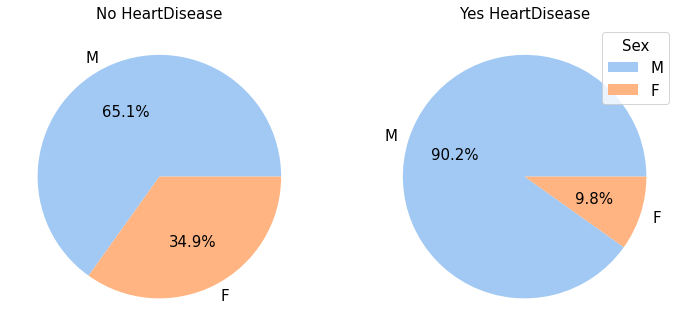

In [11]:
binary_feature = ["ExerciseAngina", "FastingBS", "Sex"]
for feature in binary_feature:
    pie_charts(df,feature,"HeartDisease")

In [12]:
def probability_calculation(feature, feature_values) : 
    
    first_with_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df[feature]==feature_values[0])])
    num_first_value = len(df[df[feature]==feature_values[0]])

    second_with_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df[feature]==feature_values[1])])
    num_second_value = len(df[df[feature]==feature_values[1]])

    print("\n" + feature + " : \n")
    print('👉 Probability of {} : {} to have Heart disease:'.format(feature,feature_values[0]), first_with_heart_disease/num_first_value)
    print('👉 Probability of {} : {} to have Heart disease:'.format(feature,feature_values[1]), second_with_heart_disease/num_second_value)

In [13]:
probability_calculation('Sex', ['M', 'F'])


Sex : 

👉 Probability of Sex : M to have Heart disease: 0.6317241379310344
👉 Probability of Sex : F to have Heart disease: 0.25906735751295334


    💡 Interpretation :
 -Most heart disease patients are Male than Females
 - Males are approximately 3 times more likely to have heart disease than females

In [14]:
probability_calculation('ExerciseAngina', ['Y', 'N'])


ExerciseAngina : 

👉 Probability of ExerciseAngina : Y to have Heart disease: 0.8517520215633423
👉 Probability of ExerciseAngina : N to have Heart disease: 0.3510054844606947


💡 Interpretation :
Angina pectoris caused by exercise :
- 37% of heart Disease Patients have Angina pectoris.
- With Angina, the probability of having heart disease is hight ( Good feature ) 

In [15]:
probability_calculation("FastingBS", [1,0])


FastingBS : 

👉 Probability of FastingBS : 1 to have Heart disease: 0.794392523364486
👉 Probability of FastingBS : 0 to have Heart disease: 0.48011363636363635


💡 Interpretation :
Angina pectoris caused by exercise :
- 37% of heart Disease Patients have Angina pectoris.
- With Angina, the probability of having heart disease is hight ( Good feature ) 

In [16]:
probability_calculation("FastingBS", [1,0])


FastingBS : 

👉 Probability of FastingBS : 1 to have Heart disease: 0.794392523364486
👉 Probability of FastingBS : 0 to have Heart disease: 0.48011363636363635


💡 Interpretation :
-Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] :
-33.5% of heart Disease Patients have Fasting blood sugar > 120mg.
-Fasting blood sugar > 120mg, the probability of having heart disease is almost 0.8 ( High ) 

### 5-1-2 Multiclass Features

In [17]:
def distribution_categorical_features(data, feature, target, colors) :
    sns.set(rc={'figure.figsize':(14,8.27)},font_scale=1.2)
    grouped_columns = sns.countplot(x=feature, hue=target, data=data,palette=colors)
    grouped_columns.set_title('Countplot for {} {}'.format(target, feature))

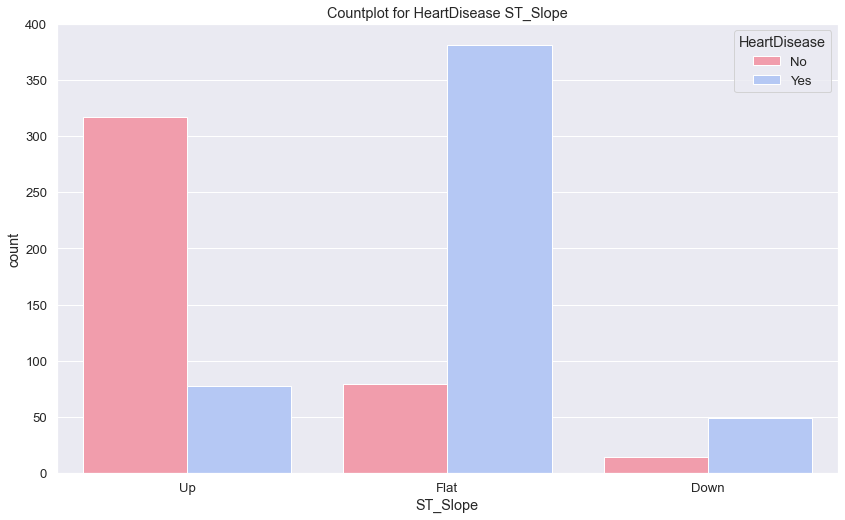

In [18]:
distribution_categorical_features(df, "ST_Slope", "HeartDisease", ["#ff8fa3","#abc4ff"])

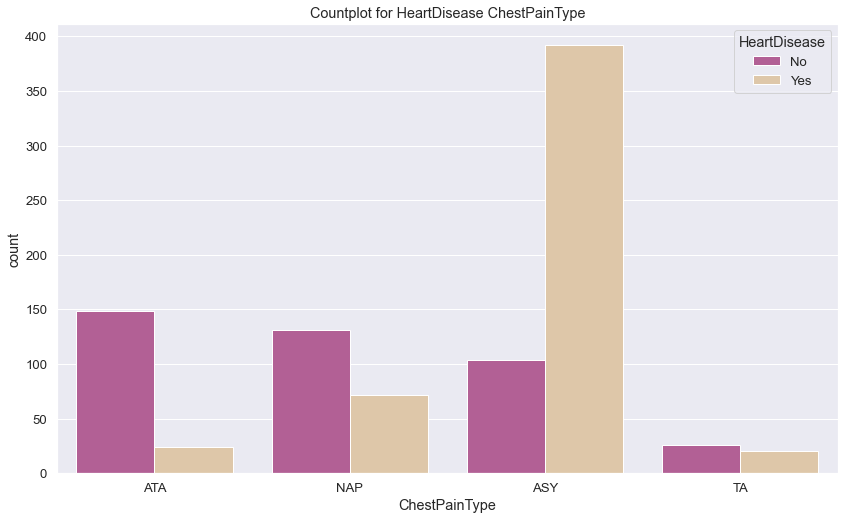

In [19]:
distribution_categorical_features(df, "ChestPainType", "HeartDisease", ["#c05299","#e7c8a0"])

💡 Interpretation

- Most Heart Disease Patients have Chest Pain with an Asymptomatic (ASY) type.
- Most Patients who have Atypical Angina (ATA) type don't have Heart Disease.

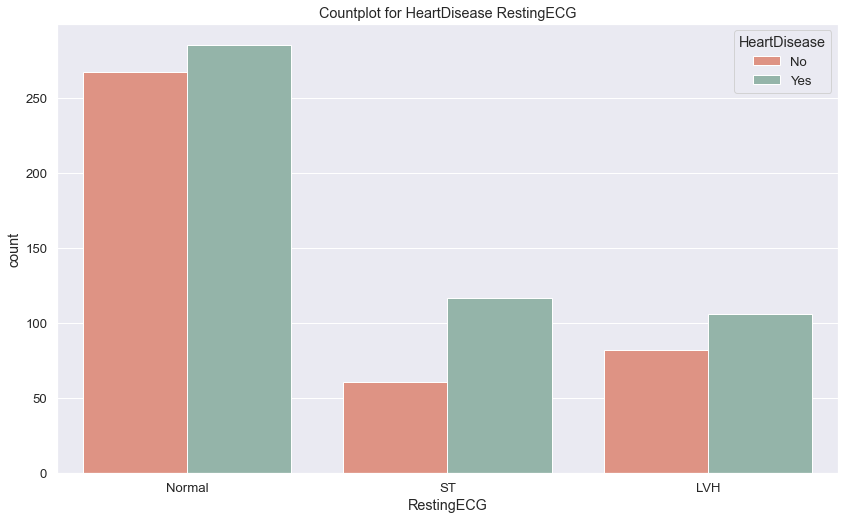

In [20]:
distribution_categorical_features(df, "RestingECG", "HeartDisease", ["#ED8975","#8FB9AA"])

💡 Interpretation :

- More than 500 patients have a normal resting ECG
- But I think it's not a criterion for detecting heart disease because it's a bit balanced between no heart disease and the existence of the disease

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

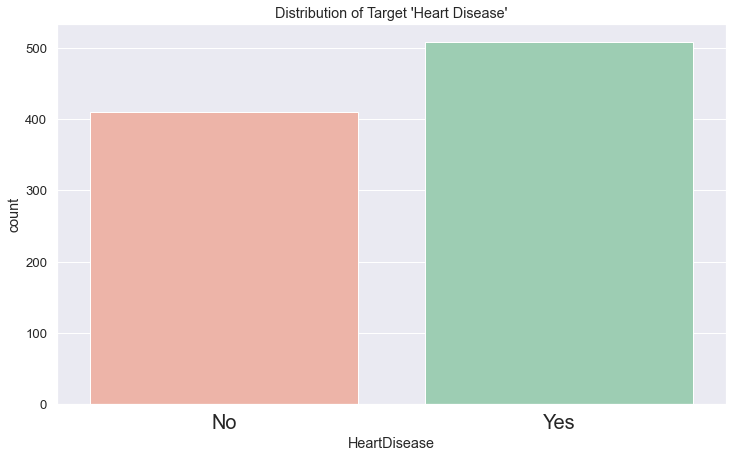

In [21]:
plt.figure(figsize=(12, 7))
heartDisease_countplot = sns.countplot(x=df.HeartDisease,palette=["#f8ad9d","#95d5b2"])
heartDisease_countplot.set_title("Distribution of Target 'Heart Disease'")
heartDisease_countplot.set_xticklabels(['No', 'Yes'], fontsize=20)

## 5-2 Numerical Features :


In [22]:
def kde_numerical_features(column, target) : 
    fig, ax = plt.subplots(figsize = (13,5))
    sns.kdeplot(df[df[target]=='Yes'][column], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
    sns.kdeplot(df[df[target]=='No'][column], alpha=0.5,shade = True, color="#fccc79", label="NoHeartDisease ", ax = ax)
    plt.title('KDE-Plot of {}'.format(column), fontsize = 18)
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
    ax.legend();
    plt.show()

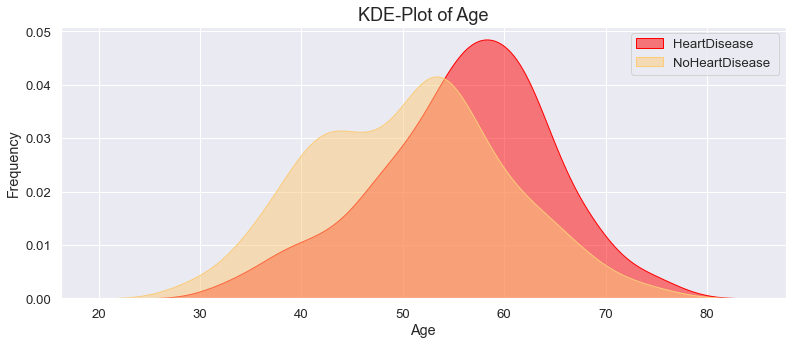

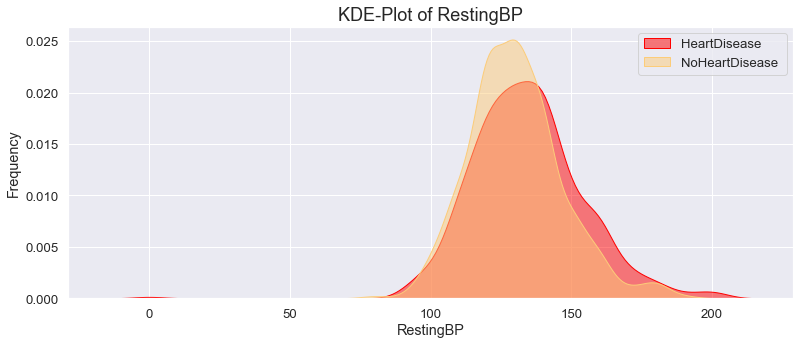

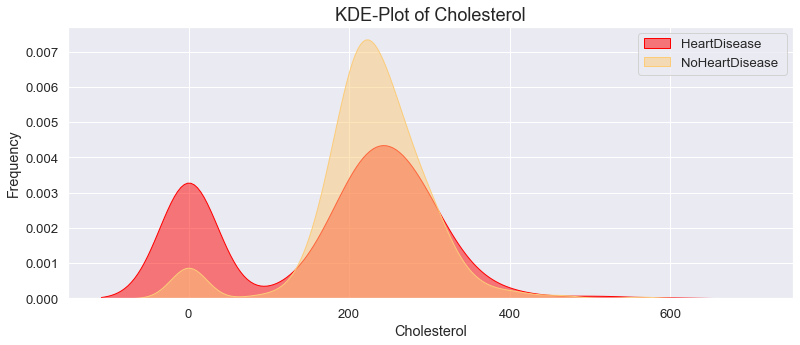

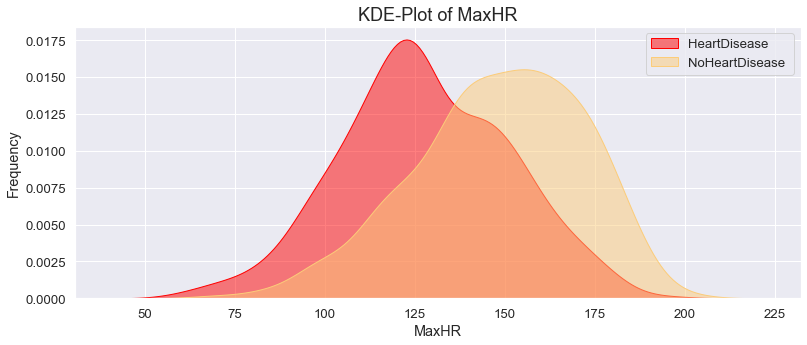

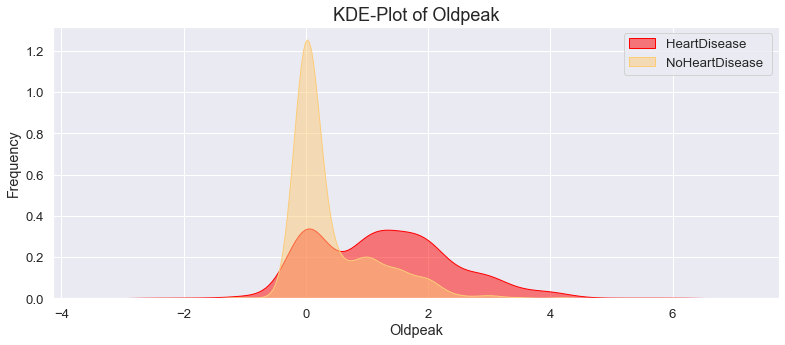

In [23]:
for column in numerical_columns : 
    kde_numerical_features(column, 'HeartDisease')

## Summary KDE-plot and Descriptive Statistics of Numerical features : 

<div class="alert alert-block alert-success">  
<dl>
<dt style="color: black" >📍 Age : </dt>
    <dd>- Average Age is 53.</dd>
    <dd>- Maximum Age is 77</dd>
    <dd>- Minimum Age is 28</dd>
    <dd>- Most of heart disease Patients have age between 55 and 65</dd>
</dl>
</div>

<div class="alert alert-block alert-info">  
<dl>
<dt style="color: black">📍 OldPeak : </dt>
    <dd>- Old peak = ST depression induced by exercise relative to rest</dd>
    <dd>- Average OldPeak is 0.88</dd>
    <dd>- Maximum OldPeak is 6.2</dd> 
    <dd>- Minimum OldPeak is -2.6</dd> 
    <dd>- Most patients with 0 oldpeak, don't have Heart disease</dd>
</dl>
</div>
<div class="alert alert-block alert-danger">  
<dl>
<dt style="color: black">📍 Cholesterol : </dt>
    <dd>- For person aged 20 years and older, the Cholesterol level should be between 125 and 200 mg/dL. <a href='https://www.verywellhealth.com/cholesterol-levels-by-age-chart-5190176'>Source</a></dd>
    <dd>- Average Cholesterol is 198.7 mg/dl</dd>
    <dd>- Maximum is 603 >>> 200 mg/dl</dd> 
    <dd>- Minimum Cholesterol is 0 => Cholesterol should be != 0</dd> 
    <dd>- Most patients with 0 oldpeak, don't have Heart disease</dd>
</dl>
</div>
<div class="alert alert-block alert-warning">  
<dl>
<dt style="color: black">📍 MaxHR : </dt>
    <dd>- There are a number of formulas out there for calculating max heart rate. The easiest and most commonly used one is to simply subtract your age from 220. So if you're 40 years old, your max heart rate would be 180 bpm. <a href='https://www.whoop.com/thelocker/calculating-max-heart-rate/'>Source</a></dd>
    <dd> - Average MaxHR is 136. Age average is 53 so based of this formula the MaxHR average will be around 167</dd>
    <dd> - Maximum is 202 >>> 200 mg/dl</dd> 
    <dd> - Minimum MaxHR is 60 => So 220 - 60 = Age = 160 years old ! hmm 🤔 </dd> 
    <dd> - Based on the formula is not logic (the oldest man in the world is 119 years old 😁 ) </dd>
    <dd> - MaxHR : Calculate your resting heart rate by counting how many times your heart beats per minute when you are at rest, such as first thing in the morning. It's usually somewhere between 60 and 100 beats per minute for the average adult.<a href="https://www.mayoclinic.org/healthy-lifestyle/fitness/in-depth/exercise-intensity/art-20046887">Source</a><br>- So 60 can be a result of calculation with another formula</dd>
    <dd>- Most of tested patients with heart disease have around 120 maxHR </dd>
</dl> 
</div>
<div class="alert alert-block alert-success">  
<dl>
<dt style="color: black" >📍 RestingBP : </dt>
    <dd>- A normal blood pressure level is less than 120/80 mmHg..</dd>
    <dd>- Minimum is 0 => Must be an outlier data</dd>
    <dd>- Maximum Age is 200</dd>
    <dd>- Most tested Patients have RestingBP between 120 and 150</dd>
</dl>
</div>

In [24]:
colors = ['lightcoral','deepskyblue',
          'orchid',    'tomato',
          'teal',      'darkcyan',
          'limegreen', 'darkorange']

def distribution_plot(column, title):

    fig = plt.figure(figsize=(17, 7))
    grid = GridSpec(nrows=2, ncols=1, figure=fig)
    color = np.random.choice(colors, 1)[0]

    ax0 = fig.add_subplot(grid[0, :])
    ax0.set_title(f'Histogram and BoxPlot of {title}')
    sns.histplot(column, ax=ax0, color=color)

    ax1 = fig.add_subplot(grid[1, :])
    plt.axis('off')
    sns.boxplot(x=column, ax=ax1, color=color)
    

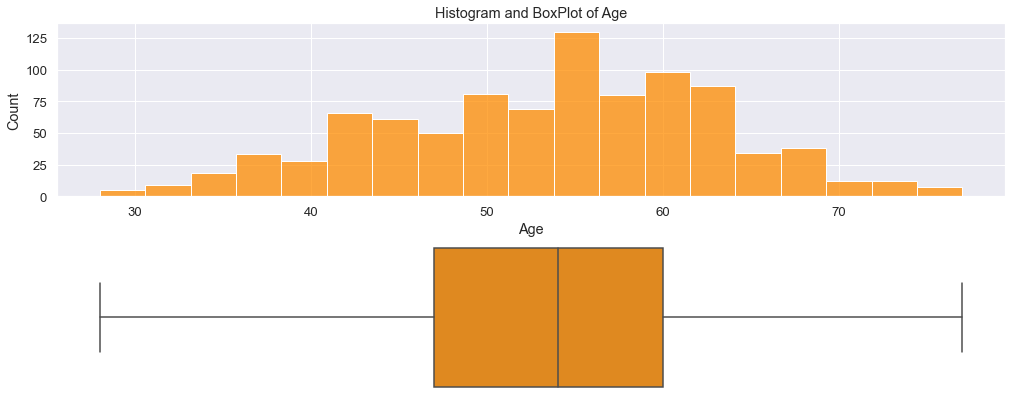

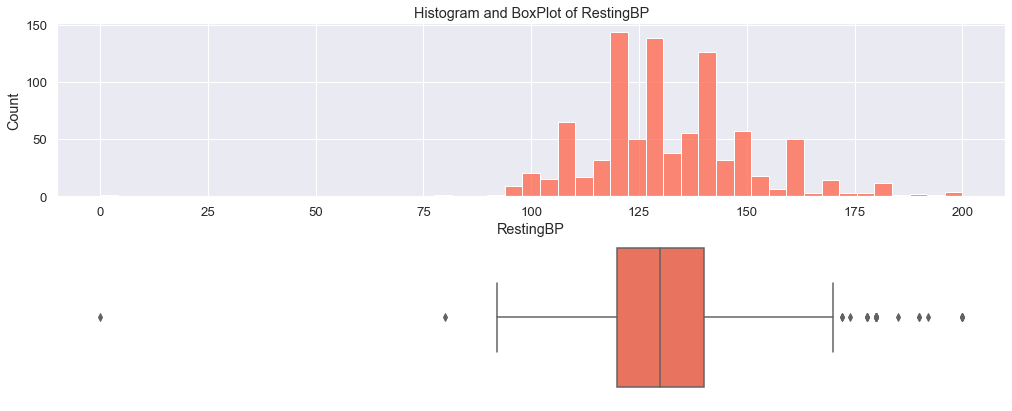

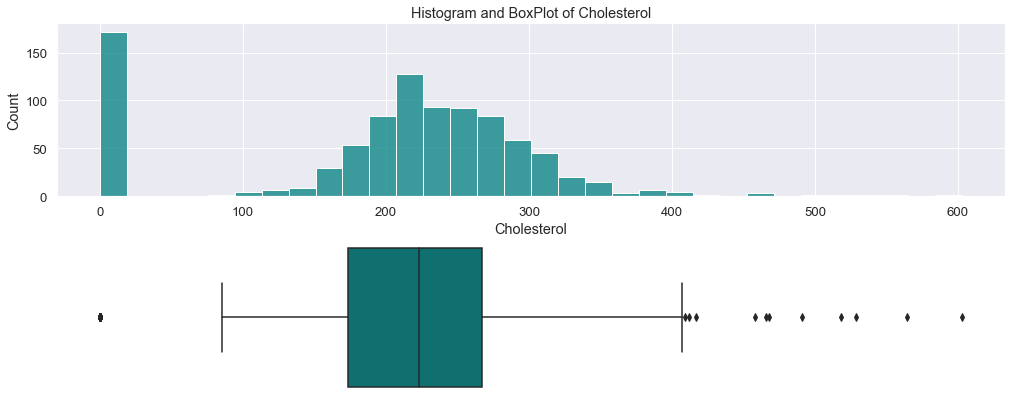

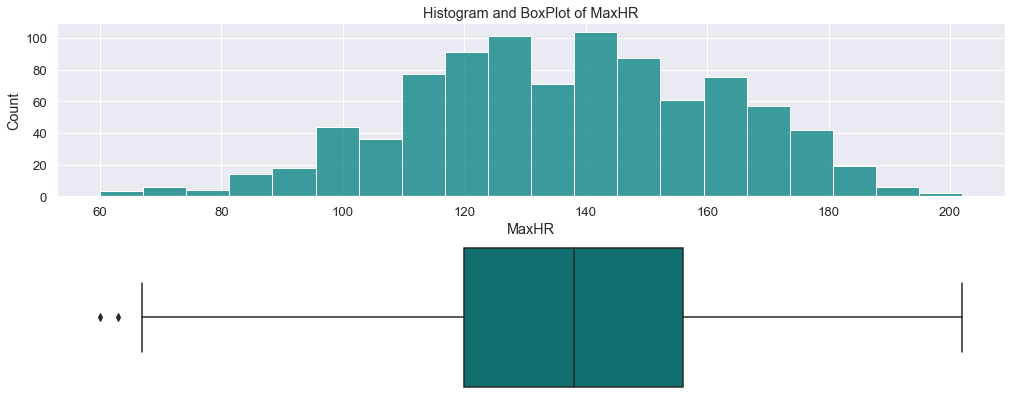

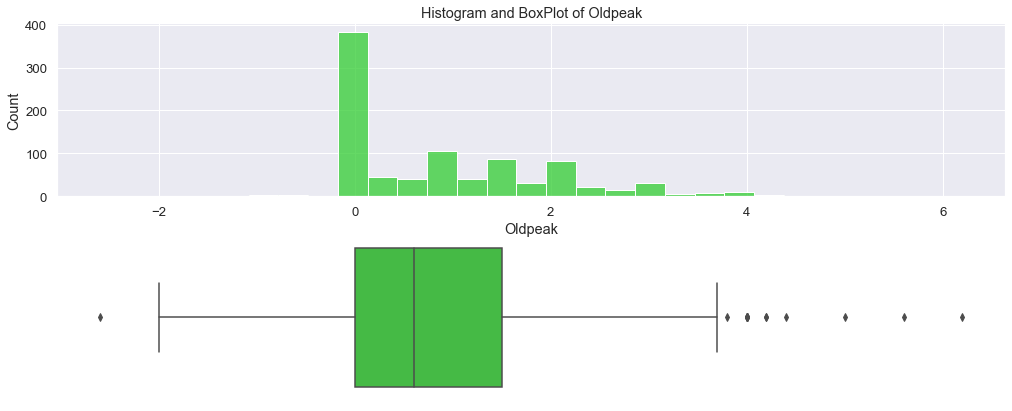

In [25]:
for col in numerical_columns:
    distribution_plot(df[col], col)

# 6 - Feature Engineering
## 6-1 Deleting Outliers  

In [26]:
def make_pretty(styler):
    styler.set_caption("Skewness")
    return styler.background_gradient(axis=None, cmap="YlGnBu")

df[numerical_columns].skew().to_frame().rename(columns={0: 'Skewness'}).sort_values(by=['Skewness'], ascending=False).style.pipe(make_pretty)

,Skewness
Oldpeak,1.022872
RestingBP,0.179839
MaxHR,-0.144359
Age,-0.195933
Cholesterol,-0.610086


In [27]:
df1 = df[df.Cholesterol != 0]
df1 = df1[df1.RestingBP > 70]

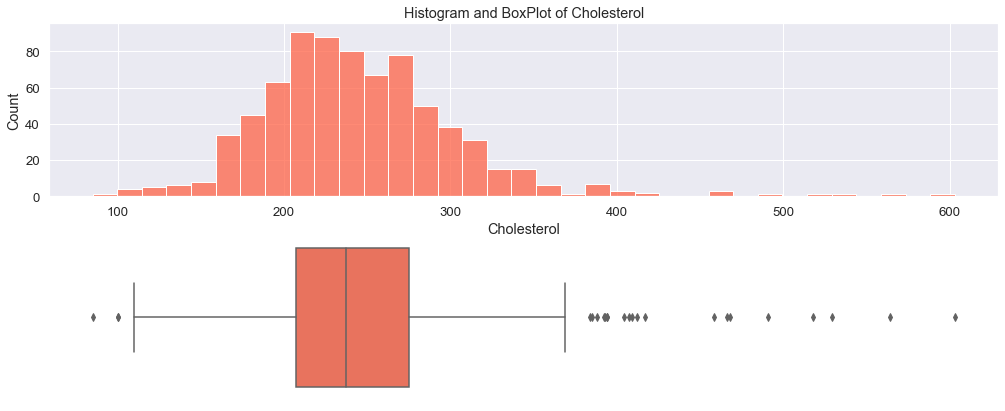

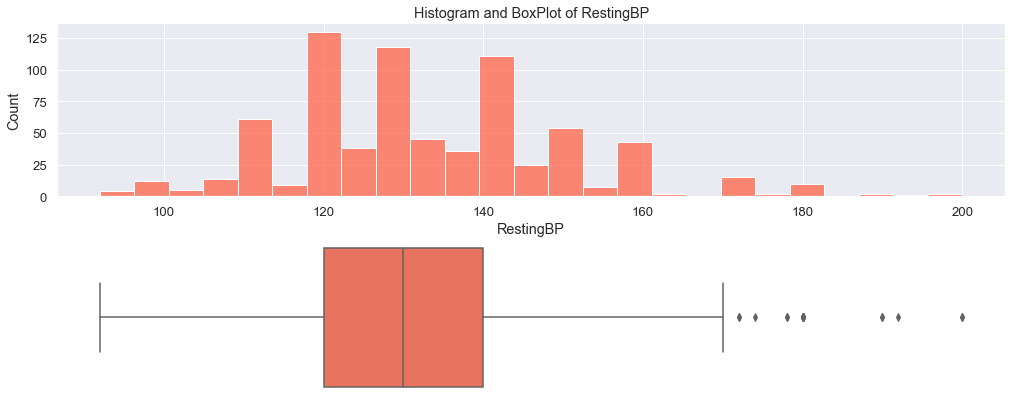

In [28]:
for col in ["Cholesterol", "RestingBP"]:
    distribution_plot(df1[col], col)

## 6-2 One Hot Encoding  & Scaling


In [29]:
final_df = pd.get_dummies(df1, columns=categorical_columns[:-1])
final_df['HeartDisease'] = final_df['HeartDisease'].cat.rename_categories({'Yes':1 , 'No': 0})
X = final_df.drop(columns=["HeartDisease"], axis=1)
y = final_df['HeartDisease']
standardizer = StandardScaler()
X_scaled = standardizer.fit_transform(X)
final_df

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
1,49,160,180,156,1.0,1,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,98,0.0,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
3,48,138,214,108,1.5,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
4,54,150,195,122,0.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,132,1.2,1,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
914,68,144,193,141,3.4,1,0,1,1,0,...,0,1,0,1,0,1,0,0,1,0
915,57,130,131,115,1.2,1,0,1,1,0,...,1,0,0,1,0,0,1,0,1,0
916,57,130,236,174,0.0,1,1,0,0,1,...,1,0,1,0,0,1,0,0,1,0


# 🎯 All about Binary Classification
Binary classification refers to those classification tasks that have two class labels.

Examples include:

- Email spam detection (spam or not).
- Churn prediction (churn or not).
- Conversion prediction (buy or not).

Typically, binary classification tasks involve one class that is the normal state and another class that is the abnormal state.



The class for the normal state is assigned the class label 0 and the class with the abnormal state is assigned the class label 1.



The Bernoulli distribution is a discrete probability distribution that covers a case where an event will have a binary outcome as either a 0 or 1. For classification, this means that the model predicts a probability of an example belonging to class 1, or the abnormal state.

 # Modeling

- Logistic Regression
- Random Forest
- K-Neighbors Classifier
- XGB Classifier
- Decision Tree Classifier
- SVC

In [30]:
# créer Xr_train et yr_train
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X,y, test_size=0.2, random_state=42) 

print('Xr_train taille: ', Xr_train.shape)
print('Xr_test taille: ', Xr_test.shape)
print('yr_train taille: ', yr_train.shape)
print('yr_test taille: ', yr_test.shape)

Xr_train taille:  (596, 21)
Xr_test taille:  (150, 21)
yr_train taille:  (596,)
yr_test taille:  (150,)


# **Evaluation des modèles**

**1. Modèle : Logistic Regression**

In [31]:
model_lg= LogisticRegression(max_iter=1000)

# entrainer le modele sur les données d'entrainement X et y
model_lg.fit(Xr_train,yr_train)
# print(model_lg)

# faire la prédiction du modèle
pred_lg = model_lg.predict(Xr_test)


print('-'*45+'\nMatrice de confusion du modèle : Régression Logistique'+'\n'+'-'*45,
      f'\n{confusion_matrix(pred_lg,yr_test)}\n',
      '-'*45+'\nRapport de classification du modèle : Régression Logistique'+'\n'+'-'*45,
      f'\n{classification_report(pred_lg,yr_test)}\n',
      '-'*45+'\nROC_AUC'+'\n'+'-'*45,
      f'\n{roc_auc_score(pred_lg,yr_test)}\n\n',
      '-'*45+'\nValeur exact d\'Accuracy'+'\n'+'-'*45,
      f'\n{model_lg.score(Xr_test, yr_test)}\n',
      '-'*45+'\nValeur exact du Précision'+'\n'+'-'*45,
      f'\n{precision_score(pred_lg,yr_test)}\n',
      '-'*45+'\nValeur exact du Recall'+'\n'+'-'*45,
      f'\n{recall_score(pred_lg,yr_test)}\n')

---------------------------------------------
Matrice de confusion du modèle : Régression Logistique
--------------------------------------------- 
[[66 10]
 [ 5 69]]
 ---------------------------------------------
Rapport de classification du modèle : Régression Logistique
--------------------------------------------- 
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        76
           1       0.87      0.93      0.90        74

    accuracy                           0.90       150
   macro avg       0.90      0.90      0.90       150
weighted avg       0.90      0.90      0.90       150

 ---------------------------------------------
ROC_AUC
--------------------------------------------- 
0.9004267425320058

 ---------------------------------------------
Valeur exact d'Accuracy
--------------------------------------------- 
0.9
 ---------------------------------------------
Valeur exact du Précision
-----------------------------------

C:\Users\Adem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


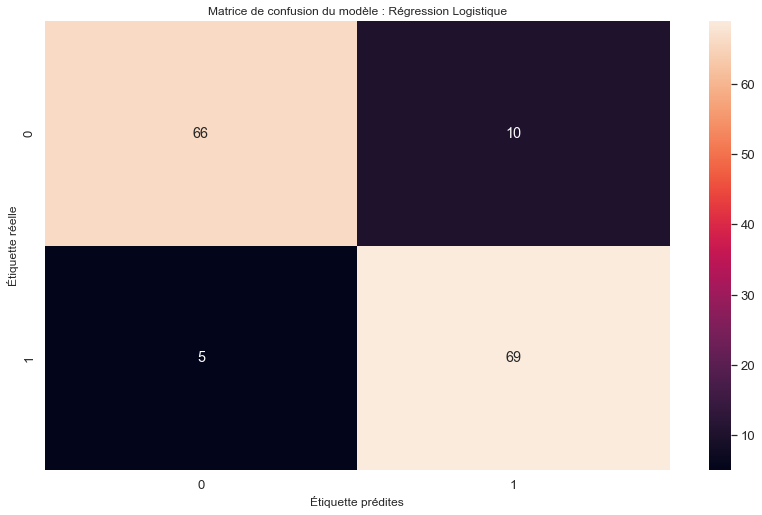

In [32]:
# matrice de confustion de la régression logistique
lg_confusion_matrix = confusion_matrix(pred_lg,yr_test)
sns.heatmap(lg_confusion_matrix, annot=True, fmt="d")

plt.title('Matrice de confusion du modèle : Régression Logistique', fontsize=12)
plt.xlabel('Étiquette prédites', fontsize= 12)
plt.ylabel('Étiquette réelle', fontsize= 12)

plt.show()

**2. Modèle : Random Forest**

In [33]:
model_rf = RandomForestClassifier()

# entrainer le modele sur les données d'entrainement X et y
model_rf.fit(Xr_train,yr_train)
# print(model_rf)

# faire la prédiction du modèle
pred_rf = model_rf.predict(Xr_test)


print('-'*45+'\nMatrice de confusion du modèle : Forêt aléatoire'+'\n'+'-'*45,
      f'\n{confusion_matrix(pred_rf,yr_test)}\n',
      '-'*45+'\nRapport de classification du modèle : Forêt aléatoire'+'\n'+'-'*45,
      f'\n{classification_report(pred_rf,yr_test)}\n',
      '-'*45+'\nROC_AUC'+'\n'+'-'*45,
      f'\n{roc_auc_score(pred_rf,yr_test)}\n\n',
      '-'*45+'\nValeur exact d\'Accuracy'+'\n'+'-'*45,
      f'\n{model_rf.score(Xr_test, yr_test)}\n',
      '-'*45+'\nValeur exact du Précision'+'\n'+'-'*45,
      f'\n{precision_score(pred_rf,yr_test)}\n',
      '-'*45+'\nValeur exact du Recall'+'\n'+'-'*45,
      f'\n{recall_score(pred_rf,yr_test)}\n')

---------------------------------------------
Matrice de confusion du modèle : Forêt aléatoire
--------------------------------------------- 
[[66  8]
 [ 5 71]]
 ---------------------------------------------
Rapport de classification du modèle : Forêt aléatoire
--------------------------------------------- 
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        74
           1       0.90      0.93      0.92        76

    accuracy                           0.91       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150

 ---------------------------------------------
ROC_AUC
--------------------------------------------- 
0.9130512091038406

 ---------------------------------------------
Valeur exact d'Accuracy
--------------------------------------------- 
0.9133333333333333
 ---------------------------------------------
Valeur exact du Précision
--------------------------------

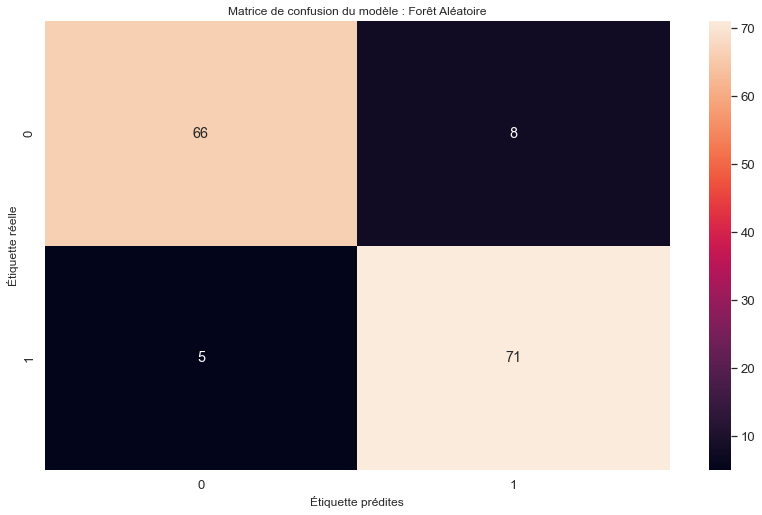

In [34]:
# matrice de confusion du Random Forest
rf_confusion_matrix = confusion_matrix(pred_rf,yr_test)
sns.heatmap(rf_confusion_matrix, annot=True, fmt="d")

plt.title('Matrice de confusion du modèle : Forêt Aléatoire', fontsize=12)
plt.xlabel('Étiquette prédites', fontsize= 12)
plt.ylabel('Étiquette réelle', fontsize= 12)

plt.show()

ROC_AUC:  0.9605990372615439


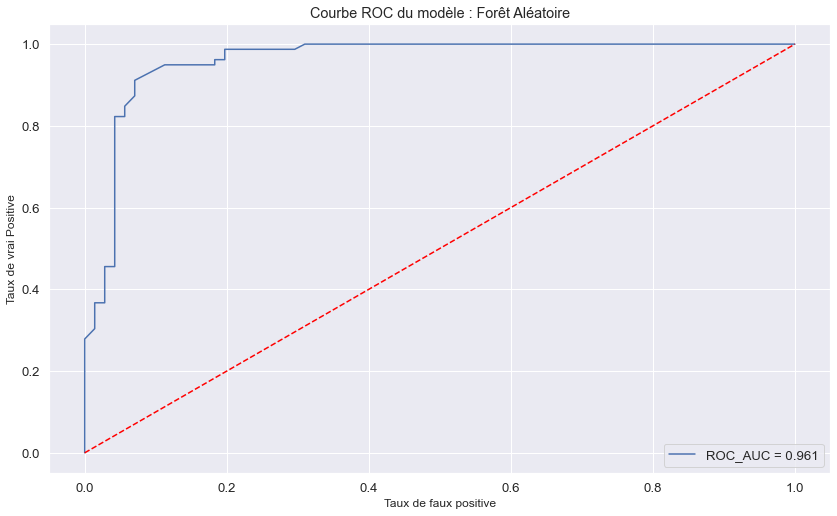

In [35]:
# voir la courbe ROC
rf_pred_proba = model_rf.predict_proba(Xr_test)[:,1]

rf_roc_auc = roc_auc_score(yr_test, rf_pred_proba)
print('ROC_AUC: ', rf_roc_auc)

rf_fpr, rf_tpr, thresholds = roc_curve(yr_test, rf_pred_proba)

plt.plot(rf_fpr, rf_tpr, label = 'ROC_AUC = %0.3f' % rf_roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='red')

plt.title("Courbe ROC du modèle : Forêt Aléatoire")
plt.xlabel("Taux de faux positive", fontsize= 12)
plt.ylabel("Taux de vrai Positive", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

[0.07719016 0.07130635 0.0708479  0.09273034 0.09602052 0.02104527
 0.02069299 0.07539474 0.01730307 0.0141965  0.00798988 0.00761199
 0.00766493 0.01796795 0.01158928 0.01310638 0.08010373 0.0670235
 0.0051927  0.09600423 0.12901758]


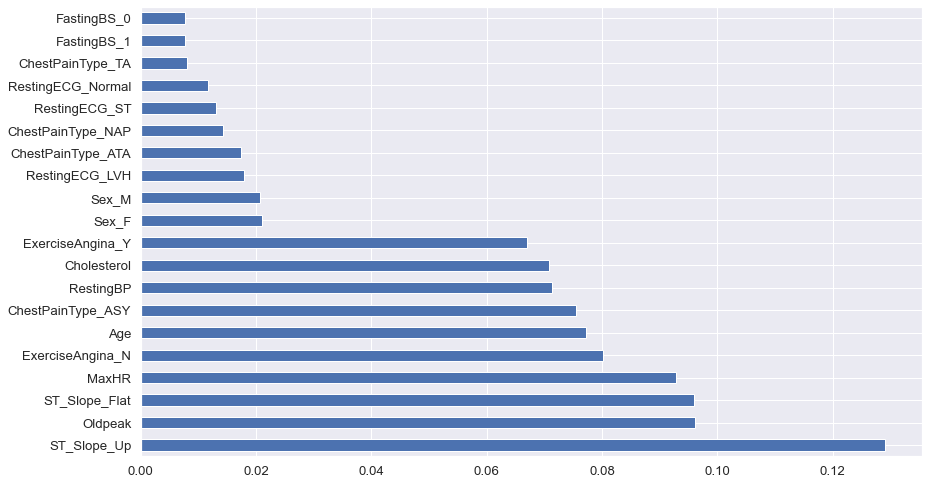

In [36]:
# voir les Features les plus impotantes pour ce modèle
print(model_rf.feature_importances_)
feat_importances = pd.Series(model_rf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [37]:
Xr_df = pd.DataFrame(X,columns=X.columns)
yr_df= pd.DataFrame(y)
feature_importances1 = pd.DataFrame(model_rf.feature_importances_,index = Xr_df.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances1

,importance
ST_Slope_Up,0.129018
Oldpeak,0.096021
ST_Slope_Flat,0.096004
MaxHR,0.092730
ExerciseAngina_N,0.080104
Age,0.077190
ChestPainType_ASY,0.075395
RestingBP,0.071306
Cholesterol,0.070848
ExerciseAngina_Y,0.067023


**3. Modèle : XGB Classifier**

In [38]:
model_xgb = XGBClassifier(max_depth= 8, n_estimators= 125, random_state= 0,  learning_rate= 0.03, n_jobs=5)

# entrainer le modele sur les données d'entrainement X et y
model_xgb.fit(Xr_train,yr_train)
# print(model_xgb)

# faire la prédiction du modèle
pred_xgb = model_xgb.predict(Xr_test)


print('-'*45+'\nMatrice de confusion du modèle : Classificateur XGB'+'\n'+'-'*45,
      f'\n{confusion_matrix(pred_xgb,yr_test)}\n',
      '-'*45+'\nRapport de classification du modèle : Classificateur XGB'+'\n'+'-'*45,
      f'\n{classification_report(pred_xgb,yr_test)}\n',
      '-'*45+'\nROC_AUC'+'\n'+'-'*45,
      f'\n{roc_auc_score(pred_xgb,yr_test)}\n\n',
      '-'*45+'\nValeur exact d\'Accuracy'+'\n'+'-'*45,
      f'\n{model_xgb.score(Xr_test, yr_test)}\n',
      '-'*45+'\nValeur exact du Précision'+'\n'+'-'*45,
      f'\n{precision_score(pred_xgb,yr_test)}\n',
      '-'*45+'\nValeur exact du Recall'+'\n'+'-'*45,
      f'\n{recall_score(pred_xgb,yr_test)}\n')

[16:37:15] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
---------------------------------------------
Matrice de confusion du modèle : Classificateur XGB
--------------------------------------------- 
[[68  8]
 [ 3 71]]
 ---------------------------------------------
Rapport de classification du modèle : Classificateur XGB
--------------------------------------------- 
              precision    recall  f1-score   support

           0       0.96      0.89      0.93        76
           1       0.90      0.96      0.93        74

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150

 ---------------------------------------------
ROC_AUC
--------------

C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


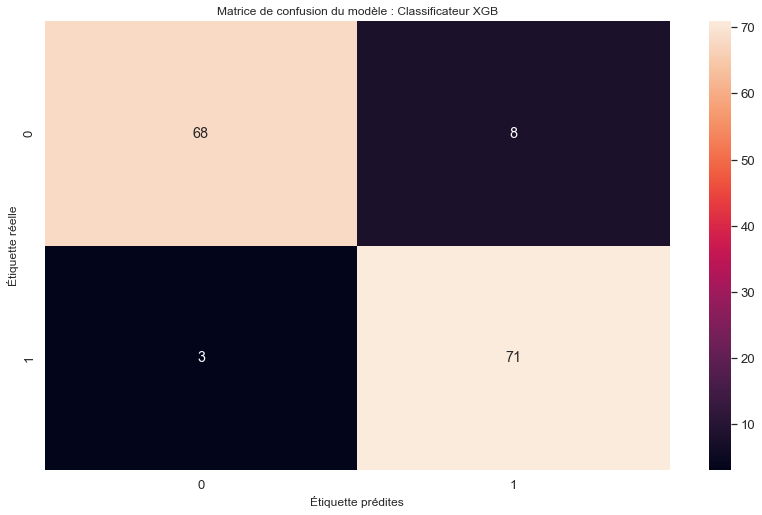

In [39]:
# matrice de confusion du XGB Classifier
xgb_confusion_matrix = confusion_matrix(pred_xgb,yr_test)
sns.heatmap(xgb_confusion_matrix, annot=True, fmt="d")

plt.title('Matrice de confusion du modèle : Classificateur XGB', fontsize=12)
plt.xlabel('Étiquette prédites', fontsize= 12)
plt.ylabel('Étiquette réelle', fontsize= 12)

plt.show()

**4. Modèle : Decision Tree Classifier**

In [40]:
model_dt = DecisionTreeClassifier(random_state=1)

# entrainer le modele sur les données d'entrainement X et y
model_dt.fit(Xr_train,yr_train)
# print(model_dt)

# faire la prédiction du modèle
pred_dt = model_dt.predict(Xr_test)

print('-'*45+'\nMatrice de confusion du modèle : Arbre de Décision'+'\n'+'-'*45,
      f'\n{confusion_matrix(pred_dt,yr_test)}\n',
      '-'*45+'\nRapport de classification du modèle : Arbre de Décision'+'\n'+'-'*45,
      f'\n{classification_report(pred_dt,yr_test)}\n',
      '-'*45+'\nROC_AUC'+'\n'+'-'*45,
      f'\n{roc_auc_score(pred_dt,yr_test)}\n\n',
      '-'*45+'\nValeur exact d\'Accuracy'+'\n'+'-'*45,
      f'\n{model_dt.score(Xr_test, yr_test)}\n',
      '-'*45+'\nValeur exact du Précision'+'\n'+'-'*45,
      f'\n{precision_score(pred_dt,yr_test)}\n',
      '-'*45+'\nValeur exact du Recall'+'\n'+'-'*45,
      f'\n{recall_score(pred_dt,yr_test)}\n')

---------------------------------------------
Matrice de confusion du modèle : Arbre de Décision
--------------------------------------------- 
[[62 15]
 [ 9 64]]
 ---------------------------------------------
Rapport de classification du modèle : Arbre de Décision
--------------------------------------------- 
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        77
           1       0.81      0.88      0.84        73

    accuracy                           0.84       150
   macro avg       0.84      0.84      0.84       150
weighted avg       0.84      0.84      0.84       150

 ---------------------------------------------
ROC_AUC
--------------------------------------------- 
0.8409535669809642

 ---------------------------------------------
Valeur exact d'Accuracy
--------------------------------------------- 
0.84
 ---------------------------------------------
Valeur exact du Précision
------------------------------------------

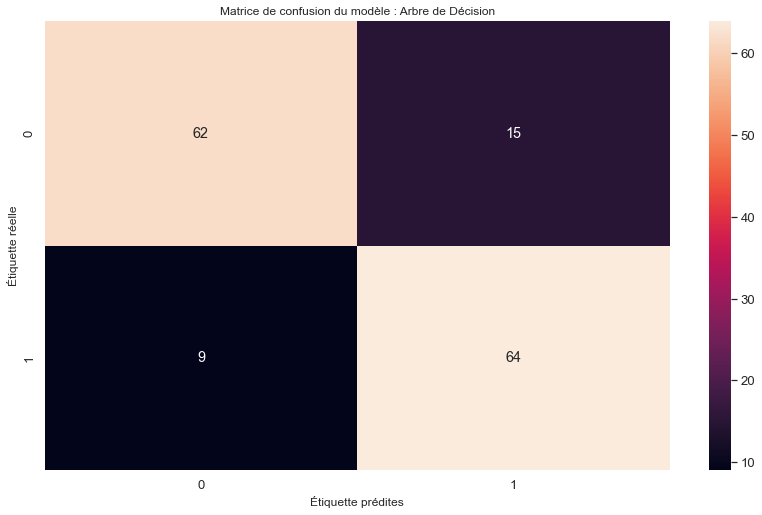

In [41]:
# matrice de confusion du Decision Tree Classifier
dt_confusion_matrix = confusion_matrix(pred_dt,yr_test)
sns.heatmap(dt_confusion_matrix, annot=True, fmt="d")

plt.title('Matrice de confusion du modèle : Arbre de Décision', fontsize=12)
plt.xlabel('Étiquette prédites', fontsize= 12)
plt.ylabel('Étiquette réelle', fontsize= 12)

plt.show()

**5. Modèle : K-Neighbors Classifier**

In [42]:
model_kn = KNeighborsClassifier()

# entrainer le modele sur les données d'entrainement X et y
model_kn.fit(Xr_train,yr_train)
# print(model_kn)

# faire la prédiction du modèle
pred_kn = model_kn.predict(Xr_test)


print('-'*45+'\nMatrice de confusion du modèle : K-plus proches voisins'+'\n'+'-'*45,
      f'\n{confusion_matrix(pred_kn,yr_test)}\n',
      '-'*45+'\nRapport de classification du modèle : K-plus proches voisins'+'\n'+'-'*45,
      f'\n{classification_report(pred_kn,yr_test)}\n',
      '-'*45+'\nROC_AUC'+'\n'+'-'*45,
      f'\n{roc_auc_score(pred_kn,yr_test)}\n\n',
      '-'*45+'\nValeur exact d\'Accuracy'+'\n'+'-'*45,
      f'\n{model_kn.score(Xr_test, yr_test)}\n',
      '-'*45+'\nValeur exact du Précision'+'\n'+'-'*45,
      f'\n{precision_score(pred_kn,yr_test)}\n',
      '-'*45+'\nValeur exact du Recall'+'\n'+'-'*45,
      f'\n{recall_score(pred_kn,yr_test)}\n')

---------------------------------------------
Matrice de confusion du modèle : K-plus proches voisins
--------------------------------------------- 
[[48 36]
 [23 43]]
 ---------------------------------------------
Rapport de classification du modèle : K-plus proches voisins
--------------------------------------------- 
              precision    recall  f1-score   support

           0       0.68      0.57      0.62        84
           1       0.54      0.65      0.59        66

    accuracy                           0.61       150
   macro avg       0.61      0.61      0.61       150
weighted avg       0.62      0.61      0.61       150

 ---------------------------------------------
ROC_AUC
--------------------------------------------- 
0.6114718614718614

 ---------------------------------------------
Valeur exact d'Accuracy
--------------------------------------------- 
0.6066666666666667
 ---------------------------------------------
Valeur exact du Précision
------------------

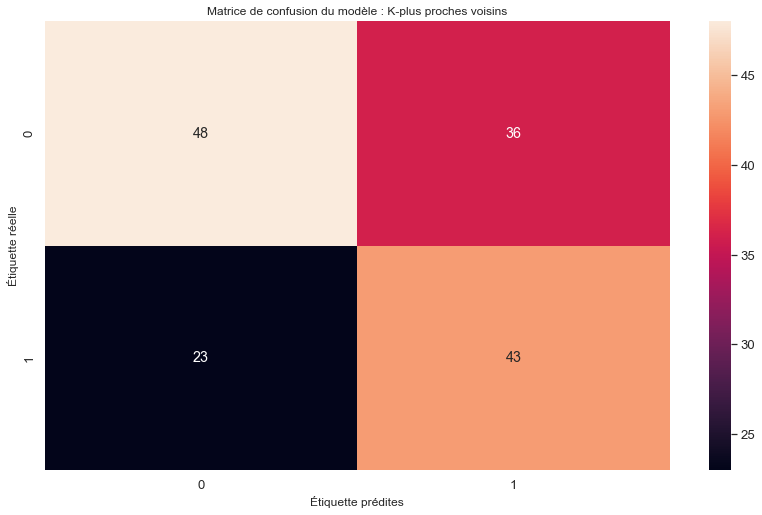

In [43]:
# matrice de confusion du Decision Tree Classifier
dt_confusion_matrix = confusion_matrix(pred_kn,yr_test)
sns.heatmap(dt_confusion_matrix, annot=True, fmt="d")

plt.title('Matrice de confusion du modèle : K-plus proches voisins', fontsize=12)
plt.xlabel('Étiquette prédites', fontsize= 12)
plt.ylabel('Étiquette réelle', fontsize= 12)

plt.show()

**6. Modèle : SVM**

In [44]:
model_svm = SVC()

# entrainer le modele sur les données d'entrainement X et y
model_svm.fit(Xr_train,yr_train)
# print(model_svm)

# faire la prédiction du modèle
pred_svm = model_svm.predict(Xr_test)

print('-'*45+'\nMatrice de confusion du modèle : SVM'+'\n'+'-'*45,
      f'\n{confusion_matrix(pred_svm,yr_test)}\n',
      '-'*45+'\nRapport de classification du modèle : SVM'+'\n'+'-'*45,
      f'\n{classification_report(pred_svm,yr_test)}\n',
      '-'*45+'\nROC_AUC'+'\n'+'-'*45,
      f'\n{roc_auc_score(pred_svm,yr_test)}\n\n',
      '-'*45+'\nValeur exact d\'Accuracy'+'\n'+'-'*45,
      f'\n{model_svm.score(Xr_test, yr_test)}\n',
      '-'*45+'\nValeur exact du Précision'+'\n'+'-'*45,
      f'\n{precision_score(pred_svm,yr_test)}\n',
      '-'*45+'\nValeur exact du Recall'+'\n'+'-'*45,
      f'\n{recall_score(pred_svm,yr_test)}\n')

---------------------------------------------
Matrice de confusion du modèle : SVM
--------------------------------------------- 
[[53 32]
 [18 47]]
 ---------------------------------------------
Rapport de classification du modèle : SVM
--------------------------------------------- 
              precision    recall  f1-score   support

           0       0.75      0.62      0.68        85
           1       0.59      0.72      0.65        65

    accuracy                           0.67       150
   macro avg       0.67      0.67      0.67       150
weighted avg       0.68      0.67      0.67       150

 ---------------------------------------------
ROC_AUC
--------------------------------------------- 
0.6733031674208145

 ---------------------------------------------
Valeur exact d'Accuracy
--------------------------------------------- 
0.6666666666666666
 ---------------------------------------------
Valeur exact du Précision
--------------------------------------------- 
0.5949367

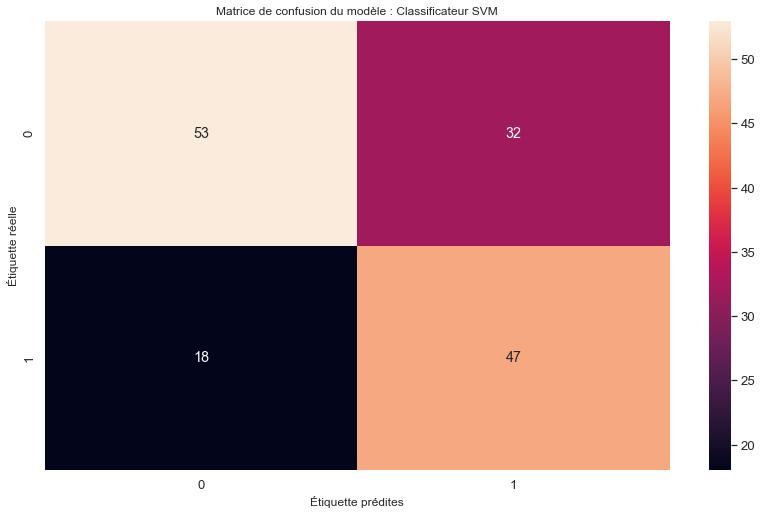

In [45]:
# matrice de confusion du SVM
svm_confusion_matrix = confusion_matrix(pred_svm,yr_test)
sns.heatmap(svm_confusion_matrix, annot=True, fmt="d")

plt.title('Matrice de confusion du modèle : Classificateur SVM', fontsize=12)
plt.xlabel('Étiquette prédites', fontsize= 12)
plt.ylabel('Étiquette réelle', fontsize= 12)

plt.show()

# **Optimisation des modèles**


**1. Voting Classifier**

> ***Random Forest / KNN / XGBClassifier***

In [46]:
model_1 = RandomForestClassifier()
model_2 = KNeighborsClassifier()
model_3 = XGBClassifier(max_depth= 8, n_estimators= 125, random_state= 0,  learning_rate= 0.03, n_jobs=5)

model_4 = VotingClassifier([('RF', model_1),
                            ('KNN', model_2),
                            ('XGBC', model_3)],
                          voting='hard')

for model in (model_1, model_2, model_3, model_4):
    model.fit(Xr_train, yr_train)
    print(model.__class__.__name__, model.score(Xr_test, yr_test))

RandomForestClassifier 0.8933333333333333
KNeighborsClassifier 0.6066666666666667
[16:37:17] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier 0.9266666666666666


C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:37:17] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
VotingClassifier 0.9133333333333333


C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [47]:
 #***Decision Tree / SVM / XGBClassifier***
model_1 = DecisionTreeClassifier(random_state=1)
model_2 = SVC()
model_3 = XGBClassifier(max_depth= 8, n_estimators= 125, random_state= 0,  learning_rate= 0.03, n_jobs=5)

model_4 = VotingClassifier([('DT', model_1),
                            ('SVM', model_2),
                            ('XGBC', model_3)],
                          voting='hard')

for model in (model_1, model_2, model_3, model_4):
    model.fit(Xr_train, yr_train)
    print(model.__class__.__name__, model.score(Xr_test, yr_test))

DecisionTreeClassifier 0.84
SVC 0.6666666666666666
[16:37:17] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier 0.9266666666666666
[16:37:17] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
VotingClassifier 0.8666666666666667


C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


>***Random Forest / Decision Tree / KNN***


In [48]:
model_1 = RandomForestClassifier()
model_2 = DecisionTreeClassifier(random_state=1)
model_3 = KNeighborsClassifier()

model_4 = VotingClassifier([('RF', model_1),
                            ('DT', model_2),
                            ('KNN', model_3)],
                          voting='hard')

for model in (model_1, model_2, model_3, model_4):
    model.fit(Xr_train, yr_train)
    print(model.__class__.__name__, model.score(Xr_test, yr_test))

RandomForestClassifier 0.9266666666666666
DecisionTreeClassifier 0.84
KNeighborsClassifier 0.6066666666666667
VotingClassifier 0.88


>***Random Forest / SVC / XGBClassifier***


In [49]:
model_1 = RandomForestClassifier()
model_2 = SVC()
model_3 = XGBClassifier(max_depth= 8, n_estimators= 125, random_state= 0,  learning_rate= 0.03, n_jobs=5)

model_4 = VotingClassifier([('RF', model_1),
                            ('SVM', model_2),
                            ('KNN', model_3)],
                          voting='hard')

for model in (model_1, model_2, model_3, model_4):
    model.fit(Xr_train, yr_train)
    print(model.__class__.__name__, model.score(Xr_test, yr_test))

RandomForestClassifier 0.9066666666666666
SVC 0.6666666666666666
[16:37:18] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier 0.9266666666666666


C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:37:19] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
VotingClassifier 0.9133333333333333


**2. Bagging**

>***Decision Tree***


In [50]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                         n_estimators=100)

model.fit(Xr_train, yr_train)
model.score(Xr_test, yr_test)

0.8933333333333333

>***KNN***


In [51]:
model = BaggingClassifier(base_estimator=KNeighborsClassifier(),
                         n_estimators=100)

model.fit(Xr_train, yr_train)
model.score(Xr_test, yr_test)

0.5933333333333334

**3. Stacking**

>***Random Forest / XGBClassifier / KNN et Logistic Regression***


In [52]:
model_1 = RandomForestClassifier()
model_2 = XGBClassifier(max_depth= 8, n_estimators= 125, random_state= 0,  learning_rate= 0.03, n_jobs=5)
model_3 = KNeighborsClassifier()
model = StackingClassifier([('RF', model_1),
                            ('XGBC', model_2),
                            ('KNN', model_3)],
                             final_estimator=LogisticRegression(max_iter=1000))

model.fit(Xr_train, yr_train)
model.score(Xr_test, yr_test)

C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:37:20] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:37:21] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:37:21] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:37:21] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:37:21] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:37:21] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9133333333333333

>***Random Forest / Decision Tree / KNN et Logistic Regression***


In [53]:
model_1 = RandomForestClassifier()
model_2 = DecisionTreeClassifier(random_state=1)
model_3 = KNeighborsClassifier()
model = StackingClassifier([('RF', model_1),
                            ('DT', model_2),
                            ('KNN', model_3)],
                             final_estimator=LogisticRegression(max_iter=1000))

model.fit(Xr_train, yr_train)
model.score(Xr_test, yr_test)

0.8866666666666667

>***Random Forest / Decision Tree / XGBClassifier et SVC***


In [54]:
model_1 = RandomForestClassifier()
model_2 = DecisionTreeClassifier(random_state=1)
model_3 = XGBClassifier(max_depth= 8, n_estimators= 125, random_state= 0,  learning_rate= 0.03, n_jobs=5)
model = StackingClassifier([('RF', model_1),
                            ('DT', model_2),
                            ('XGBC', model_3)],
                             final_estimator=SVC())

model.fit(Xr_train, yr_train)
model.score(Xr_test, yr_test)

C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:37:23] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:37:24] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:37:24] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:37:24] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:37:24] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:37:24] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9133333333333333

>***XGBClassifier / Decision Tree / KNN et Logistic Regression***


In [55]:
model_1 = XGBClassifier(max_depth= 8, n_estimators= 125, random_state= 0,  learning_rate= 0.03, n_jobs=5)
model_2 = DecisionTreeClassifier(random_state=1)
model_3 = KNeighborsClassifier()
model = StackingClassifier([('XGBC', model_1),
                            ('DT', model_2),
                            ('KNN', model_3)],
                             final_estimator=LogisticRegression(max_iter=1000))

model.fit(Xr_train, yr_train)
model.score(Xr_test, yr_test)

C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:37:24] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:37:25] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:37:25] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:37:25] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:37:25] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:37:25] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.8933333333333333

>***Random Forest / XGBClassifier / SVC et logistic regression***


In [56]:
model_1 = RandomForestClassifier()
model_2 = SVC()
model_3 = XGBClassifier(max_depth= 8, n_estimators= 125, random_state= 0,  learning_rate= 0.03, n_jobs=5)
model = StackingClassifier([('XGBC', model_1),
                            ('SVM', model_2),
                            ('KNN', model_3)],
                             final_estimator=LogisticRegression(max_iter=1000))

model.fit(Xr_train, yr_train)
model.score(Xr_test, yr_test)

C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:37:26] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:37:27] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:37:27] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:37:27] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:37:27] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:37:27] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9133333333333333

**4. Influence du fractionnement de Data Set**

>***Logistic Regression***

In [57]:
Accuracy_lg = cross_val_score(LogisticRegression(max_iter=1000), Xr_train, yr_train, cv=10, scoring='accuracy').mean()
cm_lg = confusion_matrix(yr_test, model_lg.predict(Xr_test))

print(Accuracy_lg)
print(cm_lg)

C:\Users\Adem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Adem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

0.8388418079096047
[[66  5]
 [10 69]]


C:\Users\Adem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


>***Random Forest***


In [58]:
Accuracy_rf = cross_val_score(RandomForestClassifier(), Xr_train, yr_train, cv=10, scoring='accuracy').mean()
cm_rf = confusion_matrix(yr_test, model_rf.predict(Xr_test))

print(Accuracy_rf)
print(cm_rf)

0.845536723163842
[[66  5]
 [ 8 71]]


>***XGB Classifier***

In [59]:
Accuracy_xgb = cross_val_score(XGBClassifier(max_depth= 8, n_estimators= 125,random_state= 0,  learning_rate= 0.03, n_jobs=5), Xr_train, yr_train, cv=10, scoring='accuracy').mean()
cm_xgb = confusion_matrix(yr_test, model_xgb.predict(Xr_test))

print(Accuracy_xgb)
print(cm_xgb)

[16:37:32] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:37:32] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of lab

[16:37:32] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:37:33] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:37:33] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:37:33] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:37:33] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:37:33] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Adem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:37:33] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:37:34] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8372033898305086
[[68  3]
 [ 8 71]]


>***Decision Tree***

In [60]:
Accuracy_dt = cross_val_score(DecisionTreeClassifier(random_state=1), Xr_train, yr_train, cv=10, scoring='accuracy').mean()
cm_dt = confusion_matrix(yr_test, model_dt.predict(Xr_test))

print(Accuracy_dt)
print(cm_dt)

0.7681638418079096
[[62  9]
 [15 64]]


>***K-Neighbors Classifier***


In [61]:
Accuracy_kn = cross_val_score(KNeighborsClassifier(), Xr_train, yr_train, cv=10, scoring='accuracy').mean()
cm_kn = confusion_matrix(yr_test, model_kn.predict(Xr_test))

print(Accuracy_kn)
print(cm_kn)

0.6861016949152543
[[48 23]
 [36 43]]


>***SVM***

In [62]:

Accuracy_svm = cross_val_score(SVC(), Xr_train, yr_train, cv=10, scoring='accuracy').mean()
cm_svm = confusion_matrix(yr_test, model_svm.predict(Xr_test))

print(Accuracy_svm)
print(cm_svm)

0.6809887005649717
[[53 18]
 [32 47]]
